In [1]:
import pathlib
import numpy as np

import matplotlib.pyplot as plt

import szar
from szar import foregrounds as sfg

import healpy as hp

In [2]:
source_dir = pathlib.Path('/global/cscratch1/sd/omard/scatteringtfms/sims/')

counts = np.load(source_dir/'counts.npy')
maschera = np.load(source_dir/'maschera.npy')



In [3]:
nside = 4096

In [4]:
kappa_original_alm = hp.read_alm(source_dir/'kappa_alm.fits')
#kappa_original = hp.alm2map(kappa_original_alm, nside = nside)

In [5]:
version = 'qe'
kappa_reconstructed_alm = np.load(source_dir/f'kappa_reconstructed_{version}.npy')
#kappa_reconstructed = hp.alm2map(kappa_reconstructed_alm, nside = nside)

In [6]:
clkk_rec = hp.alm2cl(kappa_reconstructed_alm)

In [7]:
clkk_input = hp.alm2cl(kappa_original_alm)

In [8]:
mlmax = 6000

In [9]:
counts_alm = hp.map2alm(counts, lmax = mlmax)

In [10]:
counts_alm_4000 = hp.map2alm(counts, lmax = 4000)

In [11]:
#hp.write_alm(source_dir/'counts_alm', counts_alm)
#counts_alm = hp.read_alm(source_dir/'counts_alm')

In [12]:
counts_masked_alm = hp.map2alm(counts*maschera, lmax = mlmax)

In [13]:
counts_masked_alm_4000 = hp.map2alm(counts*maschera, lmax = 4000)

In [14]:
#hp.write_alm(source_dir/'counts_masked_alm', counts_masked_alm)
#counts_masked_alm = hp.read_alm(source_dir/'counts_masked_alm')

In [15]:
#counts_masked_alm_extended = np.zeros_like(counts_alm)
#counts_masked_alm_extended[:counts_masked_alm.shape[0]] = counts_masked_alm

In [16]:
cl_counts_counts_masked = hp.alm2cl(counts_alm, counts_masked_alm)
cl_counts_masked = hp.alm2cl(counts_masked_alm)
cl_counts = hp.alm2cl(counts_alm)

In [17]:
len(cl_counts)

6001

In [18]:
ls = np.arange(0, len(cl_counts))

In [19]:
w2 = np.mean(maschera**2.)

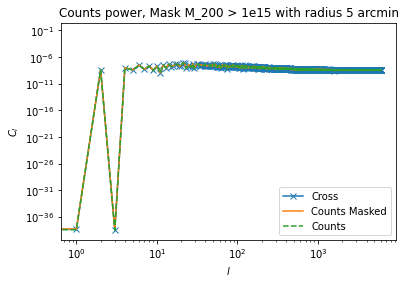

In [20]:
plt.title('Counts power, Mask M_200 > 1e15 with radius 5 arcmin')
plt.xlabel('$l$')
plt.ylabel('$C_l$')
plt.loglog(cl_counts_counts_masked, label = 'Cross', marker = 'x',)
plt.loglog(cl_counts_masked/w2, label = 'Counts Masked')
plt.loglog(cl_counts, label = 'Counts', ls = '--')
plt.legend()

In [27]:
import scipy.stats as stats

def compute_cells(ells, cls, lmin = 10, lmax = 4000, delta_ell = 30):
    
        bins = np.arange(lmin, lmax, delta_ell)

        sums = stats.binned_statistic(ells, ells, statistic='sum', bins = bins)
        cl = stats.binned_statistic(ells, ells*cls, statistic='sum', bins = bins)
        cl = cl[0] / sums[0]
        
        ells = (bins[1:]+bins[:-1])/2.0

        return ells, cl

In [21]:
titlefg = 'SOSehgalForegroundsY'
lmax_ = 4000
ksz_0 = hp.read_alm(source_dir/f'rec_fg_lm_{titlefg}_{lmax_}_it_0.fits')
ksz_1 = hp.read_alm(source_dir/f'rec_fg_lm_{titlefg}_{lmax_}_it_1.fits')
ksz_2 = hp.read_alm(source_dir/f'rec_fg_lm_{titlefg}_{lmax_}_it_2.fits')
ksz_3 = hp.read_alm(source_dir/f'rec_fg_lm_{titlefg}_{lmax_}_it_3.fits')

In [22]:
titlefg = 'SOSehgalForegroundsMaskedY'
ksz_m_0 = hp.read_alm(source_dir/f'rec_fg_lm_{titlefg}_{lmax_}_it_0.fits')
ksz_m_1 = hp.read_alm(source_dir/f'rec_fg_lm_{titlefg}_{lmax_}_it_1.fits')
ksz_m_2 = hp.read_alm(source_dir/f'rec_fg_lm_{titlefg}_{lmax_}_it_2.fits')
ksz_m_3 = hp.read_alm(source_dir/f'rec_fg_lm_{titlefg}_{lmax_}_it_3.fits')

In [23]:
clkg_input = hp.alm2cl(counts_masked_alm, kappa_original_alm)
clkg_rec = hp.alm2cl(counts_alm, kappa_reconstructed_alm)

In [24]:
ff = 'julien_'
kappa_0 = hp.read_alm(source_dir/f'kappa_{ff}lm_SOSehgalTransfer_4000_it_0.fits')
kappa_1 = hp.read_alm(source_dir/f'kappa_{ff}lm_SOSehgalTransfer_4000_it_1.fits')
kappa_2 = hp.read_alm(source_dir/f'kappa_{ff}lm_SOSehgalTransfer_4000_it_2.fits')
kappa_3 = hp.read_alm(source_dir/f'kappa_{ff}lm_SOSehgalTransfer_4000_it_3.fits')

In [25]:
clkg_rec_lens_0 = hp.alm2cl(counts_alm_4000, kappa_0)
clkg_rec_lens_1 = hp.alm2cl(counts_alm_4000, kappa_1)
clkg_rec_lens_2 = hp.alm2cl(counts_alm_4000, kappa_2)
clkg_rec_lens_3 = hp.alm2cl(counts_alm_4000, kappa_3)

In [31]:
ells = np.arange(0, len(clkg_rec_lens_0))

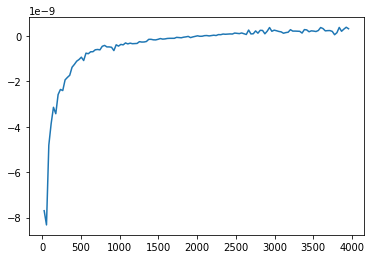

In [32]:
clkg__ = hp.alm2cl(kappa_0, ksz_m_0)
a, b = compute_cells(ells, clkg__)
plt.plot(a, b)
#plt.yscale('log')


In [33]:
clkg_fgrec_lens_0 = hp.alm2cl(counts_alm_4000, ksz_0)
clkg_fgrec_lens_1 = hp.alm2cl(counts_alm_4000, ksz_1)
clkg_fgrec_lens_2 = hp.alm2cl(counts_alm_4000, ksz_2)
clkg_fgrec_lens_3 = hp.alm2cl(counts_alm_4000, ksz_3)

In [39]:
clkg_fg_0_auto = hp.alm2cl(ksz_0, ksz_0)
clkg_fg_m_0_auto = hp.alm2cl(ksz_m_0, ksz_m_0)


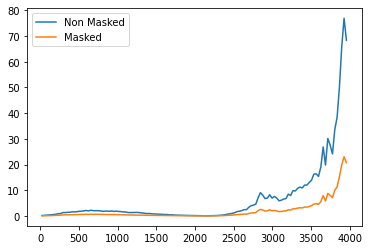

In [50]:
el, binnedkg = compute_cells(ls, clkg_input)

el, binned = compute_cells(ells, clkg_fg_0_auto)
plt.plot(el, binned/binnedkg, label = 'Non Masked')
el, binned = compute_cells(ells, clkg_fg_m_0_auto)
plt.plot(el, binned/binnedkg, label = 'Masked')
#plt.ylim(-0.01, 1)
plt.legend()


In [34]:
clkg_fgrec_m_lens_0 = hp.alm2cl(counts_alm_4000, ksz_m_0)
clkg_fgrec_m_lens_1 = hp.alm2cl(counts_alm_4000, ksz_m_1)
clkg_fgrec_m_lens_2 = hp.alm2cl(counts_alm_4000, ksz_m_2)
clkg_fgrec_m_lens_3 = hp.alm2cl(counts_alm_4000, ksz_m_3)

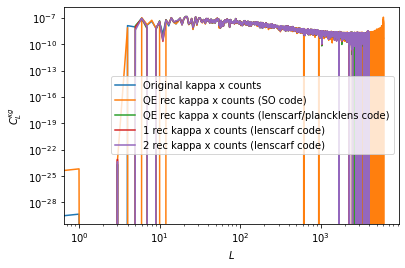

In [35]:
plt.loglog(clkg_input, label = 'Original kappa x counts')
plt.loglog(clkg_rec, label = 'QE rec kappa x counts (SO code)')
plt.loglog(clkg_rec_lens_0, label = 'QE rec kappa x counts (lenscarf/plancklens code)')
plt.loglog(clkg_rec_lens_1, label = '1 rec kappa x counts (lenscarf code)')
plt.loglog(clkg_rec_lens_2, label = '2 rec kappa x counts (lenscarf code)')

plt.ylabel('$C_L^{\kappa g}$')
plt.xlabel('$L$')
plt.legend()

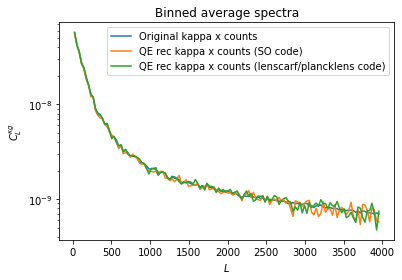

In [36]:
sel = ls>10
sell = ells>10
plt.title('Binned average spectra')
plt.plot(*compute_cells(ls, clkg_input), label = 'Original kappa x counts')
plt.plot(*compute_cells(ls, clkg_rec), label = 'QE rec kappa x counts (SO code)')
plt.plot(*compute_cells(ells, clkg_rec_lens_0), label = 'QE rec kappa x counts (lenscarf/plancklens code)')
plt.yscale('log')
plt.ylabel('$C_L^{\kappa g}$')
plt.xlabel('$L$')
plt.legend()

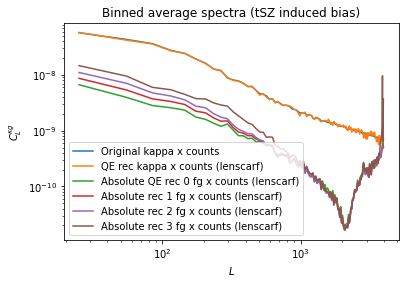

In [37]:
sel = ls>10
sell = ells>10
plt.title('Binned average spectra (tSZ induced bias)')
plt.plot(*compute_cells(ls, clkg_input), label = 'Original kappa x counts')
plt.plot(*compute_cells(ells, clkg_rec_lens_0), label = 'QE rec kappa x counts (lenscarf)')
plt.plot(*compute_cells(ells, abs(clkg_fgrec_lens_0)), label = 'Absolute QE rec 0 fg x counts (lenscarf)')
plt.plot(*compute_cells(ells, abs(clkg_fgrec_lens_1)), label = 'Absolute rec 1 fg x counts (lenscarf)')
plt.plot(*compute_cells(ells, abs(clkg_fgrec_lens_2)), label = 'Absolute rec 2 fg x counts (lenscarf)')
plt.plot(*compute_cells(ells, abs(clkg_fgrec_lens_3)), label = 'Absolute rec 3 fg x counts (lenscarf)')

plt.xscale('log')
plt.yscale('log')
plt.ylabel('$C_L^{\kappa g}$')
plt.xlabel('$L$')
plt.legend()

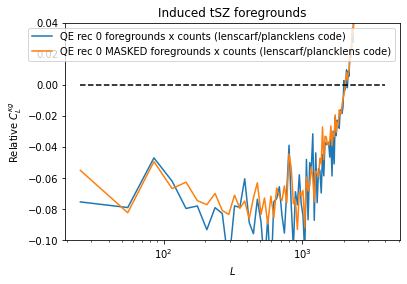

In [87]:
el, binnedkg = compute_cells(ls, clkg_input)

el, binned = compute_cells(ells, clkg_fgrec_lens_0)
plt.plot(el, binned/binnedkg, label = 'QE rec 0 foregrounds x counts (lenscarf/plancklens code)')
el, binned = compute_cells(ells, clkg_fgrec_m_lens_0)
plt.plot(el, binned/binnedkg, label = 'QE rec 0 MASKED foregrounds x counts (lenscarf/plancklens code)')

plt.plot(el, el*0., ls = '--', color = 'black')
plt.title('Induced tSZ foregrounds')
plt.ylabel('Relative $C_L^{\kappa g}$')
plt.xlabel('$L$')
plt.ylim(-0.1, 0.04)
plt.xscale('log')
plt.legend()

In [ ]:
#np.load(source_dir/f'kappa_map_reconstructed_{version}.npy')

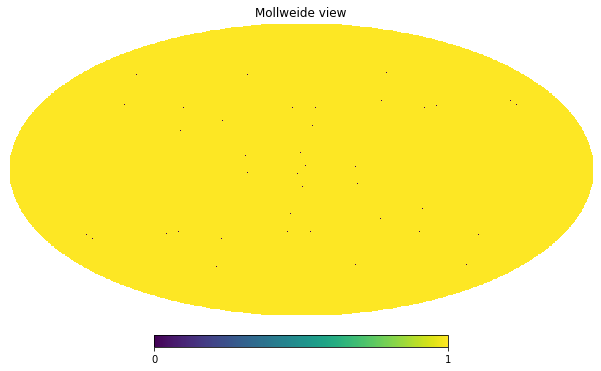

In [76]:
hp.mollview(maschera)

In [52]:
default_tcmb = 2.726
H_CGS = 6.62608e-27
K_CGS = 1.3806488e-16
C_light = 2.99792e+10

def fnu(nu,tcmb=default_tcmb):
    """
    nu in GHz
    tcmb in Kelvin
    """
    nu = np.asarray(nu)
    mu = H_CGS*(1e9*nu)/(K_CGS*tcmb)
    ans = mu/np.tanh(mu/2.0) - 4.0
    return ans

def tsz_factor_for_ymap(freq, tcmb=default_tcmb):
    return fnu(freq) * tcmb * 1e6

freq = 148

tsz_power = 'Sehgal_sim_tSZPS_unbinned_8192_y_rescale0p75.txt'
ksz_power = 'kSZ_PS_Sehgal_healpix_Nside4096_DeltaT_uK.txt'

ell, cltsz = np.loadtxt(source_dir/tsz_power, unpack = True)
cltsz *= (tsz_factor_for_ymap(freq))**2
ell, clksz = np.loadtxt(source_dir/ksz_power, unpack = True)

ell = ell[1:]
cltsz = cltsz[1:]
clksz = clksz[1:]

In [53]:
thclksz = sfg.power_ksz_reion(ell)+sfg.power_ksz_late(ell)

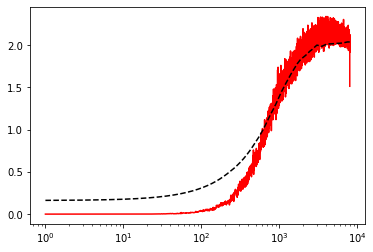

In [63]:
#plt.plot(ell, cltsz, label = 'tsz', color = 'b')
#plt.plot(ell, thcltsz, color = 'b', ls = '--')

factor = ell*(ell+1)/(2*np.pi)
#factor = 1.

plt.plot(ell, factor*clksz, label = 'ksz', color = 'r')
plt.plot(ell, factor*thclksz*2/3, color = 'black', ls = '--')

plt.xscale('log')